In [114]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [115]:
#Load the dataset from CSV
data= pd.read_csv("house_data.csv")

Exploratory Data Analysis (EDA)

In [116]:
#Displaying the first few rows of the dataset
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [117]:
#Descriptive statistics of numerical columns
data.describe(include=[np.number])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [118]:
#Check for missing values
data.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Correlation Matrix Visualization

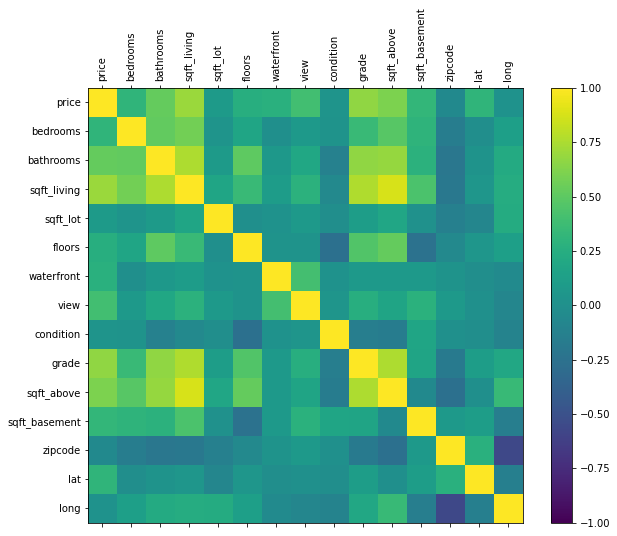

In [119]:
names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long']
df = data[names]
correlations = df.corr()

fig, ax = plt.subplots(figsize=(10, 8))  # Creating a larger figure for better visualization
cax = ax.matshow(correlations, cmap='viridis', vmin=-1, vmax=1)  # Using a colormap for better visualization
fig.colorbar(cax)

ticks = list(range(len(names)))  # Using 'len(names)' to handle dynamic number of features
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=90)  # Rotating x-axis labels for better readability
ax.set_yticklabels(names)

plt.show()

Data Preprocessing

In [120]:
#Categorical Variable Conversion
data['waterfront'] = pd.Categorical(data['waterfront'], ordered=True)
data['view'] = pd.Categorical(data['view'], ordered=True)
data['condition'] = pd.Categorical(data['condition'], ordered=True)
data['grade'] = pd.Categorical(data['grade'], ordered=False)
data['zipcode'] = pd.Categorical(data['zipcode'], ordered=False)
data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

Data Visualization

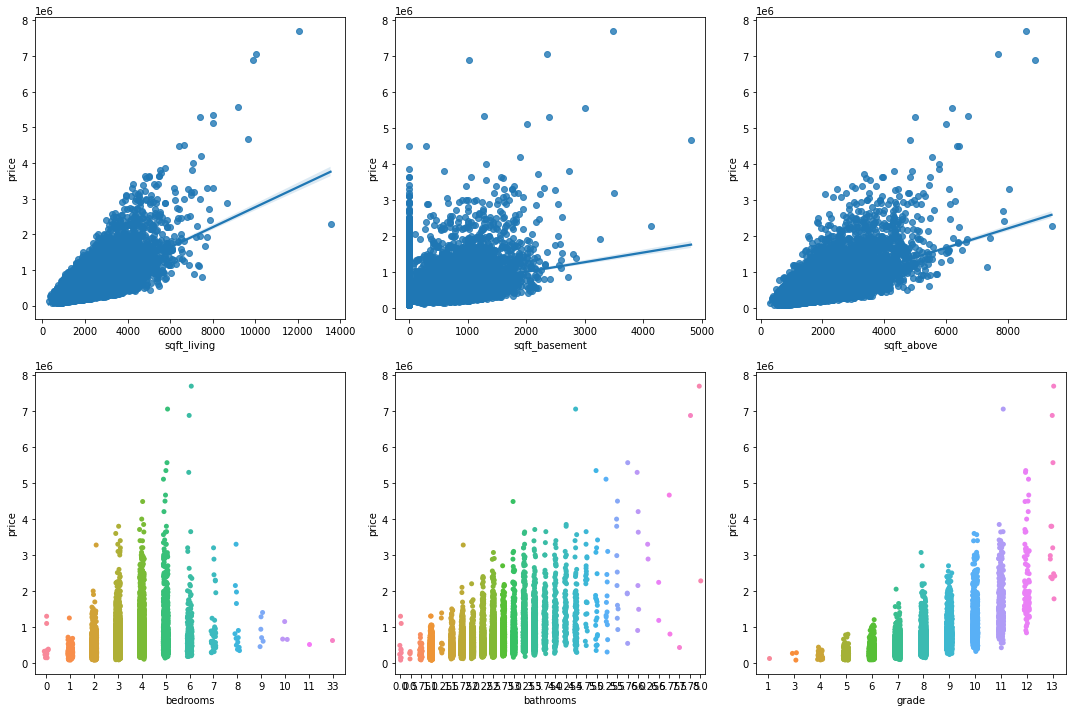

In [121]:
# Assuming 'data' is your DataFrame containing the relevant data
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plotting the regplots
sns.regplot(x='sqft_living', y='price', data=data, ax=axes[0, 0])
sns.regplot(x='sqft_basement', y='price', data=data, ax=axes[0, 1])
sns.regplot(x='sqft_above', y='price', data=data, ax=axes[0, 2])

# Plotting the stripplots
sns.stripplot(x='bedrooms', y='price', data=data, ax=axes[1, 0])
sns.stripplot(x='bathrooms', y='price', data=data, size=5, ax=axes[1, 1])
sns.stripplot(x='grade', y='price', data=data, size=5, ax=axes[1, 2])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#sns.regplot(x='sqft_living',y='price',data=data)

Data Cleaning

In [122]:
data=data[data['bedrooms'] < 10]

In [123]:
data=data[data['bathrooms']<8]

In [124]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Model Building and Evaluation (Linear Regression)

In [125]:
#Selecting Features
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df=data[c]

In [126]:
df=pd.get_dummies(df,columns=['grade'], drop_first=True)

In [127]:
y=data['price']

In [128]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)

In [129]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_above,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
19151,3,2.50,1830,1830,0,0,0,0,0,1,0,0,0,0,0
6248,4,2.50,2310,2310,0,0,0,0,0,1,0,0,0,0,0
13665,4,1.50,1800,1800,0,0,0,0,1,0,0,0,0,0,0
7241,4,2.50,2740,2740,0,0,0,0,0,1,0,0,0,0,0
17293,3,1.75,1280,1030,0,0,0,0,0,1,0,0,0,0,0


In [130]:
reg=LinearRegression()

In [131]:
reg.fit(x_train,y_train)

LinearRegression()

In [132]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-2.40123752e+04  1.18612408e+03  2.33256303e+02 -9.39663792e+01
  4.46669342e+04  5.62905144e+04  6.16023467e+04  8.28966221e+04
  1.14383769e+05  1.87484516e+05  3.32521890e+05  5.28281249e+05
  8.30136022e+05  1.33105258e+06  2.03634349e+06]


In [133]:
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))


58127859345.848854


In [134]:
reg.score(x_test,y_test)

0.5945984881530678

In [135]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [136]:
y=data['price']
df= df.drop(['date','id','price'],axis=1)

In [137]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)

In [138]:
reg.fit(x_train,y_train)

LinearRegression()

In [139]:
print('Coefficients: \n', reg.coef_)
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))
print(reg.score(x_test,y_test))

Coefficients: 
 [-1.17800136e+04  2.70496925e+04  1.91904005e+12  2.93916257e-01
 -3.05685648e+04 -1.91904005e+12 -1.91904005e+12 -3.12221698e+02
  2.23279526e+01  2.09990624e+05 -1.81880953e+05  1.58193302e+01
 -1.59134477e-01  5.48449995e+05  9.31119605e+04  7.70645906e+04
  1.41845810e+05  3.16325265e+05  8.49872711e+04  8.86505185e+04
  1.14726129e+05  1.55270962e+05  2.93563435e+04 -4.75961039e+04
 -8.94459781e+04 -9.16074259e+04 -8.70330450e+04 -6.54284605e+04
  1.01974315e+04  1.26787603e+05  3.29637962e+05  7.22650992e+05
  1.37780895e+06  1.97255777e+04 -1.13140598e+04  7.21993571e+05
  2.68322468e+05  2.22865881e+05  2.17454326e+05  2.30362790e+05
  1.04525840e+05  5.43038152e+04  8.91013499e+04  6.86333232e+04
  6.35828028e+04 -4.22070755e+04  1.73143374e+05  1.66443383e+05
  4.64140371e+04  2.20873649e+05  1.40055495e+04  1.46351891e+04
 -1.10973209e+04  2.98381216e+05  1.28690308e+05  7.00542648e+04
  1.11473757e+06  4.65326584e+05  2.40453673e+04  1.58072359e+05
  1.95058

In [140]:
predictions = reg.predict(x_test)

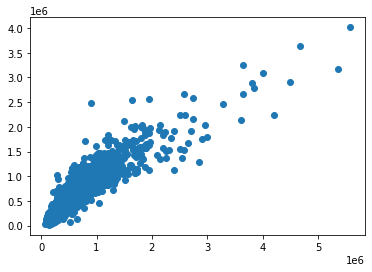

In [141]:
plt.scatter(y_test,predictions)

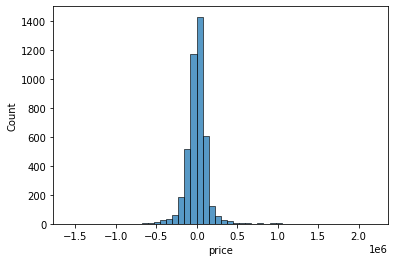

In [145]:
sns.histplot((y_test-predictions),bins=50);

Model Evaluation Metrics

In [144]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 89752.10393627515
Mean Square Error: 24035264826.473675
Root Mean Square Error: 155033.10880735662
